<a href="https://colab.research.google.com/github/JoeEbbyKaruthedath/JoeEbbyKaruthedath/blob/main/Predicting_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SET UP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV, KFold,train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm

In [ ]:
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## DATA EXPLORATION

In [ ]:
purchase = pd.read_excel('C:/Users/Joe Ebby/Desktop/Emory Desktop/BA/HW/HW4/HW4.xlsx')

In [ ]:
purchase = purchase.set_index('sequence_number')
purchase.head(10)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
sequence_number,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
5,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
6,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1995,2002,0,0,1,0,0.06
7,1,0,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0.06
8,1,0,0,1,0,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0.08
9,1,1,0,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,488.50


In [ ]:
#clean the data by removing noise data
purchase.loc[purchase['Purchase'].eq(0), 'Spending'] = 0
purchase

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
sequence_number,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
5,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,29.50
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10.00
1998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0.00


In [ ]:
#delete 'purchase' in case of data leackage
purchase = purchase.drop(columns='Purchase')
purchase.head(10)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
sequence_number,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,127.87
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,127.48
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.00
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.00
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1995,2002,0,0,1,0.00
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1498,1529,0,0,1,0.00
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,3397,3397,0,1,0,0.00
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,4,525,2914,1,1,0,488.50


In [ ]:
#explore the data
purchase[['Freq','last_update_days_ago', '1st_update_days_ago', 'Spending']].describe()

,Freq,last_update_days_ago,1st_update_days_ago,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.417000,2155.101000,2435.601500,102.545290
std,1.405738,1141.302846,1077.872233,186.758304
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1133.000000,1671.250000,0.000000
50%,1.000000,2280.000000,2721.000000,1.595000
75%,2.000000,3139.250000,3353.000000,152.532500
max,15.000000,4188.000000,4188.000000,1500.060000


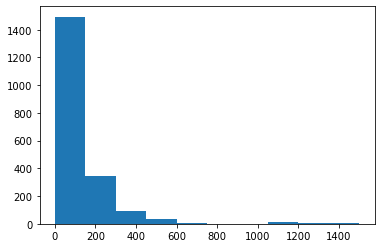

In [ ]:
#split X and y
X = purchase.iloc[:,:-1]
y = purchase['Spending']
y = pd.DataFrame(y)
#show target distribution
plt.hist(y)
plt.show()

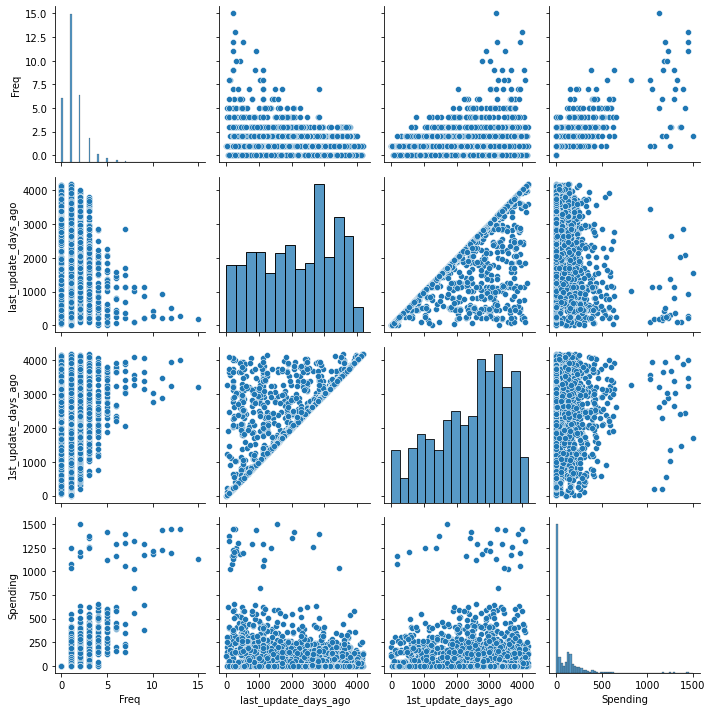

In [ ]:
cols = ['Freq','last_update_days_ago', '1st_update_days_ago','Spending'] # Select Attributes

sns.pairplot(purchase[cols], height=2.5)      # Plot pairwise relationships in a dataset
plt.tight_layout()                            # Tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()                                    # Display figure

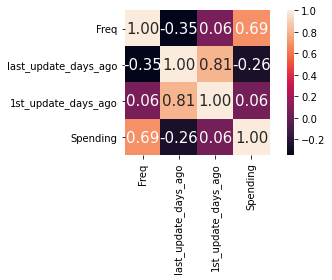

In [ ]:
import numpy as np

cm = np.corrcoef(purchase[cols].values.T) # Return Pearson product-moment correlation coefficients

hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
plt.show()

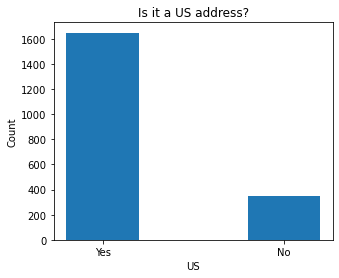

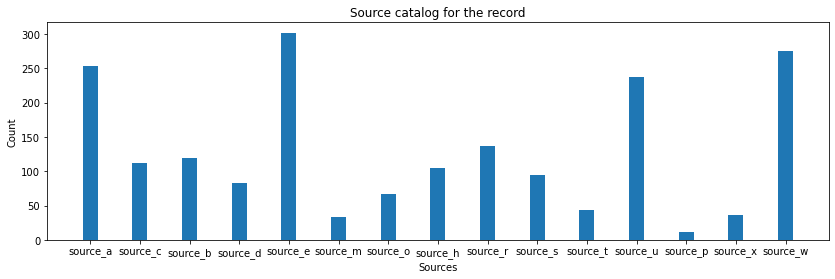

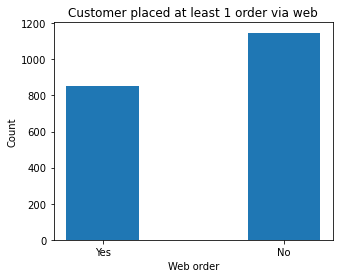

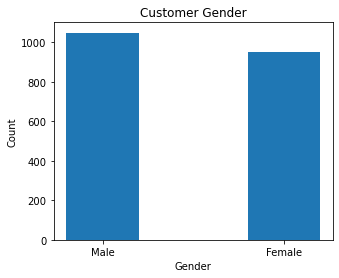

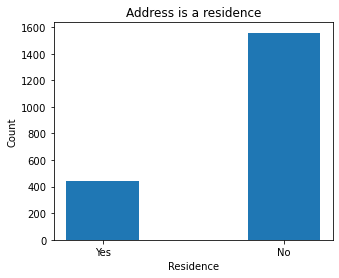

In [ ]:
#Categorical varibles
import numpy as np
import matplotlib.pyplot as plt

df2 = purchase['US']
US = ['Yes', 'No']
Count = [sum(df2), df2.count()-sum(df2)]  
fig = plt.figure(figsize = (5, 4))
# creating the bar plot
plt.bar(US, Count,width = 0.4)
plt.xlabel("US")
plt.ylabel("Count")
plt.title("Is it a US address?")
plt.show()


source = ['source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w']
Count2=[]
for i in range(0,15):
    x = sum(purchase[source[i]])
    Count2.append(x)    
fig = plt.figure(figsize = (14, 4))
plt.bar(source, Count2,width = 0.3)
plt.xlabel("Sources")
plt.ylabel("Count")
plt.title("Source catalog for the record")
plt.show()


df3 = purchase['Web order']
web = ['Yes', 'No']
Count3 = [sum(df3), df3.count()-sum(df3)]  
fig = plt.figure(figsize = (5, 4)) 
# creating the bar plot
plt.bar(web, Count3,width = 0.4)
plt.xlabel("Web order")
plt.ylabel("Count")
plt.title("Customer placed at least 1 order via web")
plt.show()


df4 = purchase['Gender=male']
gender = ['Male', 'Female']
Count4 = [sum(df4), df4.count()-sum(df4)] 
fig = plt.figure(figsize = (5, 4))
# creating the bar plot
plt.bar(gender, Count4,width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer Gender")
plt.show()
         

df5 = purchase['Address_is_res']
res = ['Yes', 'No']
Count5 = [sum(df5), df5.count()-sum(df5)] 
fig = plt.figure(figsize = (5, 4))
# creating the bar plot
plt.bar(res, Count5,width = 0.4)
plt.xlabel("Residence")
plt.ylabel("Count")
plt.title("Address is a residence")
plt.show()

## MODEL BUILDING

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

#Linear Regression
slr = LinearRegression()
slr.fit(X, y)
slr_cv = cross_val_score(slr, X=X, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('Linear Regression:')
#print('Slope: %.3f', slr.coef_)
print("CV RMSE: ",slr_cv.mean(), " +/- ", slr_cv.std())

#KNN Regressor
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std)

knn = KNeighborsRegressor()
knn.fit(X_std, y)
knn_cv = cross_val_score(knn, X=X_std, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('\nKNN Regressor:')
print("CV RMSE: ",knn_cv.mean(), " +/- ", knn_cv.std())

#Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)
tree_cv = cross_val_score(tree, X=X, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('\nDecision Tree Regressor:')
print("CV RMSE: ",tree_cv.mean(), " +/- ", tree_cv.std())

Linear Regression:
CV RMSE:  -126.07570768280516  +/-  20.682964546449657

KNN Regressor:
CV RMSE:  -144.1024946134442  +/-  23.993706464035142

Decision Tree Regressor:
CV RMSE:  -160.97935717347508  +/-  29.454379418918904


## FEATURE ENGINEERING

In [ ]:
#Generate polynomial and interaction features
quadratic = PolynomialFeatures(degree=2) #if an input[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
cubic = PolynomialFeatures(degree=3)

In [ ]:
#generate quandratic features
X_new_quad = pd.DataFrame(quadratic.fit_transform(X.loc[:,['Freq','last_update_days_ago', '1st_update_days_ago']])).drop(range(1,4),axis=1)
X_new_quad.index += 1
X_new_quad

,0,4,5,6,7,8,9
1,1.0,4.0,7324.0,7324.0,13410244.0,13410244.0,13410244.0
2,1.0,0.0,0.0,0.0,8410000.0,8410000.0,8410000.0
3,1.0,4.0,7766.0,7828.0,15077689.0,15198062.0,15319396.0
4,1.0,1.0,829.0,829.0,687241.0,687241.0,687241.0
5,1.0,1.0,869.0,869.0,755161.0,755161.0,755161.0
...,...,...,...,...,...,...,...
1996,1.0,1.0,1701.0,1701.0,2893401.0,2893401.0,2893401.0
1997,1.0,1.0,2633.0,2633.0,6932689.0,6932689.0,6932689.0
1998,1.0,0.0,0.0,0.0,11519236.0,11519236.0,11519236.0
1999,1.0,1.0,253.0,253.0,64009.0,64009.0,64009.0


In [ ]:
#add new features to dataset
X_quad = pd.concat([X, X_new_quad], axis=1)
X_quad

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,Web order,Gender=male,Address_is_res,0,4,5,6,7,8,9
1,1,0,0,1,0,0,0,0,0,0,...,1,0,1,1.0,4.0,7324.0,7324.0,13410244.0,13410244.0,13410244.0
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,1.0,0.0,0.0,0.0,8410000.0,8410000.0,8410000.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,4.0,7766.0,7828.0,15077689.0,15198062.0,15319396.0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1.0,1.0,829.0,829.0,687241.0,687241.0,687241.0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,869.0,869.0,755161.0,755161.0,755161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1.0,1.0,1701.0,1701.0,2893401.0,2893401.0,2893401.0
1997,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1.0,1.0,2633.0,2633.0,6932689.0,6932689.0,6932689.0
1998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,0.0,0.0,0.0,11519236.0,11519236.0,11519236.0
1999,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1.0,1.0,253.0,253.0,64009.0,64009.0,64009.0


In [ ]:
#generate cubic features
X_new_cubic = pd.DataFrame(cubic.fit_transform(X.loc[:,['Freq','last_update_days_ago', '1st_update_days_ago']])).drop(range(1,4),axis=1)
X_new_cubic.index += 1
X_new_cubic

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,1.0,4.0,7324.0,7324.0,13410244.0,13410244.0,13410244.0,8.0,14648.0,14648.0,26820488.0,26820488.0,26820488.0,4.910831e+10,4.910831e+10,4.910831e+10,4.910831e+10
2,1.0,0.0,0.0,0.0,8410000.0,8410000.0,8410000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.438900e+10,2.438900e+10,2.438900e+10,2.438900e+10
3,1.0,4.0,7766.0,7828.0,15077689.0,15198062.0,15319396.0,8.0,15532.0,15656.0,30155378.0,30396124.0,30638792.0,5.854667e+10,5.901407e+10,5.948521e+10,5.996012e+10
4,1.0,1.0,829.0,829.0,687241.0,687241.0,687241.0,1.0,829.0,829.0,687241.0,687241.0,687241.0,5.697228e+08,5.697228e+08,5.697228e+08,5.697228e+08
5,1.0,1.0,869.0,869.0,755161.0,755161.0,755161.0,1.0,869.0,869.0,755161.0,755161.0,755161.0,6.562349e+08,6.562349e+08,6.562349e+08,6.562349e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1.0,1.0,1701.0,1701.0,2893401.0,2893401.0,2893401.0,1.0,1701.0,1701.0,2893401.0,2893401.0,2893401.0,4.921675e+09,4.921675e+09,4.921675e+09,4.921675e+09
1997,1.0,1.0,2633.0,2633.0,6932689.0,6932689.0,6932689.0,1.0,2633.0,2633.0,6932689.0,6932689.0,6932689.0,1.825377e+10,1.825377e+10,1.825377e+10,1.825377e+10
1998,1.0,0.0,0.0,0.0,11519236.0,11519236.0,11519236.0,0.0,0.0,0.0,0.0,0.0,0.0,3.909629e+10,3.909629e+10,3.909629e+10,3.909629e+10
1999,1.0,1.0,253.0,253.0,64009.0,64009.0,64009.0,1.0,253.0,253.0,64009.0,64009.0,64009.0,1.619428e+07,1.619428e+07,1.619428e+07,1.619428e+07


In [ ]:
#add new features to dataset
X_cubic = pd.concat([X, X_new_cubic], axis=1)
X_cubic

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,10,11,12,13,14,15,16,17,18,19
1,1,0,0,1,0,0,0,0,0,0,...,8.0,14648.0,14648.0,26820488.0,26820488.0,26820488.0,4.910831e+10,4.910831e+10,4.910831e+10,4.910831e+10
2,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.438900e+10,2.438900e+10,2.438900e+10,2.438900e+10
3,1,0,0,0,0,0,0,0,0,0,...,8.0,15532.0,15656.0,30155378.0,30396124.0,30638792.0,5.854667e+10,5.901407e+10,5.948521e+10,5.996012e+10
4,1,0,1,0,0,0,0,0,0,0,...,1.0,829.0,829.0,687241.0,687241.0,687241.0,5.697228e+08,5.697228e+08,5.697228e+08,5.697228e+08
5,1,0,1,0,0,0,0,0,0,0,...,1.0,869.0,869.0,755161.0,755161.0,755161.0,6.562349e+08,6.562349e+08,6.562349e+08,6.562349e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,0,0,0,0,0,0,0,0,0,...,1.0,1701.0,1701.0,2893401.0,2893401.0,2893401.0,4.921675e+09,4.921675e+09,4.921675e+09,4.921675e+09
1997,1,0,0,0,0,0,0,0,0,0,...,1.0,2633.0,2633.0,6932689.0,6932689.0,6932689.0,1.825377e+10,1.825377e+10,1.825377e+10,1.825377e+10
1998,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.909629e+10,3.909629e+10,3.909629e+10,3.909629e+10
1999,1,0,0,0,0,0,0,0,0,0,...,1.0,253.0,253.0,64009.0,64009.0,64009.0,1.619428e+07,1.619428e+07,1.619428e+07,1.619428e+07


In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Linear Regression
slr= LinearRegression()

slr_q = slr.fit(X_quad, y)
slr_cv_q = cross_val_score(slr_q, X=X_quad, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('Linear Regression (quan):')
#print('Slope: %.3f', slr_q.coef_)
print("CV RMSE: ",slr_cv_q.mean(), " +/- ", slr_cv_q.std())

slr_c = slr.fit(X_cubic, y)
slr_cv_c = cross_val_score(slr_c, X=X_cubic, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('Linear Regression (cubic):')
#print('Slope: %.3f', slr_c.coef_)
print("CV RMSE: ",slr_cv_c.mean(), " +/- ", slr_cv_c.std())

Linear Regression (quan):
CV RMSE:  -126.33586542976983  +/-  21.78390017982238
Linear Regression (cubic):
CV RMSE:  -129.04476119750794  +/-  20.67900629750123


In [ ]:
#KNN Regressor
knn = KNeighborsRegressor()

scaler = StandardScaler()
X_quad_std = scaler.fit_transform(X_quad)
X_quad_std = pd.DataFrame(X_quad_std)
X_cubic_std = scaler.fit_transform(X_cubic)
X_cubic_std = pd.DataFrame(X_cubic_std)

knn_q = knn.fit(X_quad_std, y)
knn_cv_q = cross_val_score(knn_q, X=X_quad_std, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('KNN Regressor (quan):')
#print('Slope: %.3f', slr_q.coef_)
print("CV RMSE: ",knn_cv_q.mean(), " +/- ", knn_cv_q.std())

knn_c = knn.fit(X_cubic_std, y)
knn_cv_c = cross_val_score(knn_c, X=X_cubic_std, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('KNN Regressor (cubic):')
#print('Slope: %.3f', slr_c.coef_)
print("CV RMSE: ",knn_cv_c.mean(), " +/- ", knn_cv_c.std())

KNN Regressor (quan):
CV RMSE:  -141.2619808501933  +/-  25.667881576001093
KNN Regressor (cubic):
CV RMSE:  -140.77723481590073  +/-  24.708080194841997


In [ ]:
#Decision Tree Regressorn
tree = DecisionTreeRegressor(random_state=42)

tree_q = tree.fit(X_quad, y)
tree_cv_q = cross_val_score(tree_q, X=X_quad, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('Decision Tree Regressor (quan):')
#print('Slope: %.3f', slr_q.coef_)
print("CV RMSE: ",tree_cv_q.mean(), " +/- ", tree_cv_q.std())

tree_c = tree.fit(X_cubic, y)
tree_cv_c = cross_val_score(tree_c, X=X_cubic, y=y, scoring='neg_root_mean_squared_error', cv=cv)
print('Decision Tree Regressorn (cubic):')
#print('Slope: %.3f', slr_c.coef_)
print("CV RMSE: ",tree_cv_c.mean(), " +/- ", tree_cv_c.std())

Decision Tree Regressor (quan):
CV RMSE:  -161.76353331167917  +/-  28.122125052574795
Decision Tree Regressorn (cubic):
CV RMSE:  -169.955154963629  +/-  26.3138414925179


## PARAMETER TUNING

In [ ]:
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Linear Regression Parameter Tuning
#Ridge
gs_ri = GridSearchCV(estimator=Ridge(), 
                  param_grid=[{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}],
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=-1)

gs_ri = gs_ri.fit(X_quad,y)
print("Parameter Tuning #2\n")
print("Non-nested CV RMSE: ", gs_ri.best_score_)
print("Optimal Parameter: ", gs_ri.best_params_)
print("Optimal Estimator: ", gs_ri.best_estimator_)

NCV_gs_ri = cross_val_score(gs_ri, X=X, y=y, scoring='neg_root_mean_squared_error', cv=outer_cv)
print("Nested CV RMSE:",NCV_gs_ri.mean(), " +/- ", NCV_gs_ri.std())

#Lasso
gs_la = GridSearchCV(estimator=Lasso(), 
                  param_grid=[{'alpha':np.arange(0, 1.1, 0.1)}],
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=-1)

gs_la = gs_la.fit(X_quad,y)
print("\nNon-nested CV RMSE: ", gs_la.best_score_)
print("Optimal Parameter: ", gs_la.best_params_)
print("Optimal Estimator: ", gs_la.best_estimator_)

NCV_gs_la = cross_val_score(gs_la, X=X, y=y, scoring='neg_root_mean_squared_error', cv=outer_cv)
print("Nested CV RMSE:",NCV_gs_la.mean(), " +/- ", NCV_gs_la.std())

C:\Users\Will Jiang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.73333e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Parameter Tuning #2

Non-nested CV RMSE:  -126.25498281221587
Optimal Parameter:  {'alpha': 10}
Optimal Estimator:  Ridge(alpha=10)
Nested CV RMSE: -125.97787065893954  +/-  20.76658387563856

Non-nested CV RMSE:  -126.12505315254846
Optimal Parameter:  {'alpha': 0.4}
Optimal Estimator:  Lasso(alpha=0.4)
Nested CV RMSE: -125.87236001332602  +/-  20.82122755693335


In [ ]:
#KNN Regressor Parameter Tuning

#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsRegressor())])

#Parameters to optimize
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance']
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=-1)

gs_knn = gs_knn.fit(X_cubic,y) 
print("Parameter Tuning #3\n")
print("Non-nested CV RMSE: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

NCV_gs_knn = cross_val_score(gs_knn, X=X_cubic, y=y, scoring='neg_root_mean_squared_error', cv=outer_cv)
print("Nested CV RMSE: ",NCV_gs_knn.mean(), " +/- ", NCV_gs_knn.std())

Parameter Tuning #3

Non-nested CV RMSE:  -135.34830765245187
Optimal Parameter:  {'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=13))])
Nested CV RMSE:  -136.33243613904824  +/-  25.896468381746416


In [ ]:
#Decision Tree Regressor Parameter Tuning
gs_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                  param_grid=[{'max_depth': range(1,20),
                             'min_samples_leaf':range(1,10),
                             'min_samples_split':range(2,10)}],
                              scoring='neg_root_mean_squared_error',
                              cv=inner_cv,
                              n_jobs=-1) #use all core to run codes

gs_tree = gs_tree.fit(X,y)
print("Parameter Tuning #1\n")
print("Non-nested CV RMSE: ", gs_tree.best_score_)
print("Optimal Parameter: ", gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)

NCV_gs_tree = cross_val_score(gs_tree, X=X, y=y, scoring='neg_root_mean_squared_error', cv=outer_cv)
print("Nested CV RMSE: ",NCV_gs_tree.mean(), " +/- ", NCV_gs_tree.std())

Parameter Tuning #1

Non-nested CV RMSE:  -129.81239775699243
Optimal Parameter:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 9}
Optimal Estimator:  DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=9,
                      random_state=42)
Nested CV RMSE:  -137.80480365417372  +/-  22.433296505668906
